# Necessary Imports

In [1]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

# Retrieving Stock Price Data


In [2]:
data = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

In [3]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [6]:
data.tail(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-18,188.74,100.86,53.22,1723.79,231.39,276.56,2773.75,12.31,1.1622,1277.9100,22.27,121.11
2018-06-19,185.69,100.86,52.93,1734.78,228.32,275.50,2762.59,13.35,1.1588,1274.3700,22.05,120.80
2018-06-20,186.50,101.87,53.46,1750.08,227.82,275.97,2767.32,12.79,1.1570,1267.7000,21.92,120.26
2018-06-21,185.46,101.14,52.19,1730.22,226.98,274.24,2749.76,14.64,1.1601,1266.8101,21.91,120.05
2018-06-22,184.92,100.41,52.50,1715.67,226.02,274.74,2754.88,13.77,1.1655,1268.4900,22.18,120.34
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.0000,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.6400,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.6200,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.8800,21.93,118.22


In [10]:
data[['AAPL.O']].head()  # first five rows of single column


,AAPL.O
Date,
2010-01-01,NaN
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827


In [9]:
data[['AAPL.O', 'MSFT.O']].head()  # last five rows of 2 columns

,AAPL.O,MSFT.O
Date,,
2010-01-01,NaN,NaN
2010-01-04,30.572827,30.950
2010-01-05,30.625684,30.960
2010-01-06,30.138541,30.770
2010-01-07,30.082827,30.452


In [11]:
data.loc['2017-10-06']  # single row via index value

AAPL.O     155.3000
MSFT.O      76.0000
INTC.O      39.6300
AMZN.O     989.5800
GS.N       246.0200
SPY        254.3700
.SPX      2549.3300
.VIX         9.6500
EUR=         1.1733
XAU=      1275.3000
GDX         23.5900
GLD        121.0900
Name: 2017-10-06 00:00:00, dtype: float64

In [13]:
data.iloc[:20]  # twenty rows via index numbers

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.800
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.700
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.510
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.820
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.370
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.850
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.490
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.540


# Data Visualization

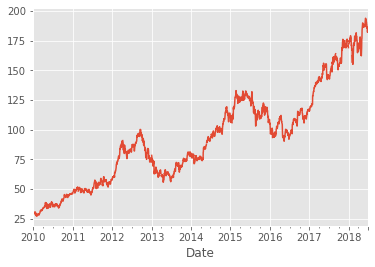

In [16]:
data['AAPL.O'].plot()

In [17]:
# log returns
# fully vectorized operation for log return calculation
rets = np.log(data['AAPL.O'] / data['AAPL.O'].shift(1))

In [18]:
rets

Date
2010-01-01         NaN
2010-01-04         NaN
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001850
                ...   
2018-06-25   -0.014983
2018-06-26    0.012330
2018-06-27   -0.001465
2018-06-28    0.007250
2018-06-29   -0.002105
Name: AAPL.O, Length: 2216, dtype: float64

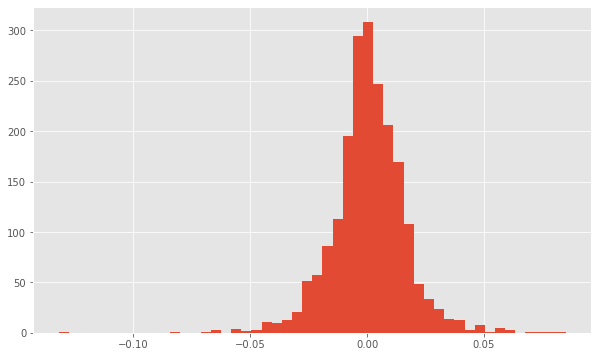

In [23]:
rets.hist(figsize=(10, 6), bins=50);

# Calculating a Moving Average

In [36]:
# fully vectorized calculation of 50 days moving average/trend
data.dropna(inplace=True)
data['MA50'] = data['AAPL.O'].rolling(50).mean()

In [35]:
data[:60]

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,MA50
Date,,,,,,,,,,,,,
2010-02-11,28.381400,28.1200,20.0600,120.090,154.05,108.1300,1078.47,23.96,1.3681,1094.95,43.990000,107.130000,NaN
2010-02-12,28.625686,27.9300,20.4300,119.660,153.93,108.0400,1075.51,22.73,1.3615,1092.40,43.940000,107.040000,NaN
2010-03-01,29.855684,29.0200,20.8700,124.540,156.54,111.8900,1115.71,19.26,1.3560,1116.95,44.640000,109.430000,NaN
2010-03-02,29.835684,28.4600,20.6975,125.530,158.75,112.2000,1118.31,19.06,1.3604,1134.25,45.510000,111.020000,NaN
2010-03-03,29.904256,28.4600,20.5200,125.890,157.72,112.3000,1118.79,18.83,1.3698,1139.10,46.364000,111.630000,NaN
2010-03-04,30.101398,28.6300,20.5300,128.530,163.61,112.6410,1122.97,18.72,1.3579,1131.60,45.580000,110.830000,NaN
2010-03-05,31.278540,28.5875,20.7900,128.910,167.18,114.2500,1138.70,17.42,1.3621,1131.65,46.430000,110.810000,NaN
2010-03-08,31.297112,28.6300,20.7700,130.110,169.84,114.2700,1138.50,17.79,1.3628,1122.00,45.950000,109.880000,NaN
2010-03-09,31.859968,28.8000,20.9400,128.820,168.85,114.4600,1140.45,17.92,1.3600,1119.70,45.580000,109.718000,NaN


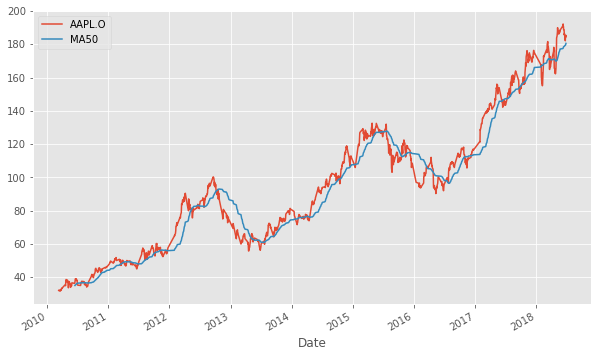

In [38]:
data[['AAPL.O', 'MA50']].plot(figsize=(10, 6));

In [27]:
data['AAPL.O'].rolling(50)

Rolling [window=50,center=False,axis=0]

In [28]:
test=data['AAPL.O'].rolling(50)

In [29]:
test


Rolling [window=50,center=False,axis=0]

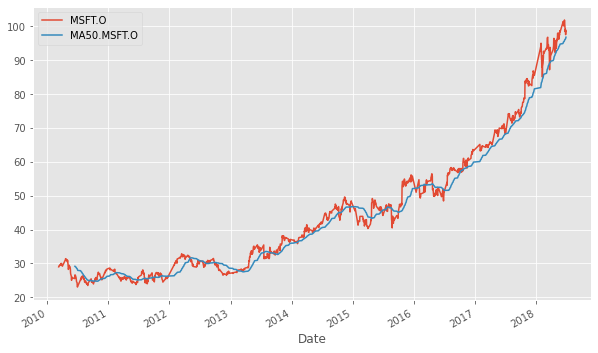

In [39]:
data['MA50.MSFT.O'] = data['MSFT.O'].rolling(50).mean()
data[['MSFT.O', 'MA50.MSFT.O']].plot(figsize=(10, 6));